# Librería Matplotlib
[Video](https://www.youtube.com/watch?v=O_OeWxpnUc0)
[Documentación](https://matplotlib.org/api/pyplot_summary.html)

Es muy importante comprender el valor que tienen los gráficos, la forma en la que se representan los datos puede ayudarnos a entender mejor la información, descubrir tendencias y explicar fenómenos. 

Dentro de Matplotlib encontramos el módulo **pyplot**, la herramienta que nos permite realizar representaciones gráficas en Python. Hay dos formas para reprensentar gráficos y conviene aprenderlos bien porque normalmente la gente suele mezclarlos. Estos son: 
1. Función `.plot()`
2. OOP

## 1. Función .plot()
Veamos el modulo Pyplot del paquete Matplotlib y la primera forma de realizar gráficos. 

`plt.plot(x,y)`
`plt.show(x,y)`

In [1]:
# importamos el modulo de pyplot
import matplotlib.pyplot as plt
import numpy as np

Los datos que vamos a represntar son los de la curva $y = x^{2}$ en el intervalo de 0 a 2

In [9]:
# los valores que va a tomar x : 10 puntos entre 0 y 2 
x = np.linspace(0,2,10)

# la función en cuestión 
y = x**2
x

array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ])

Ya tenemos tanto x como los valores de y, por lo que podemos representarlos fácilmente.

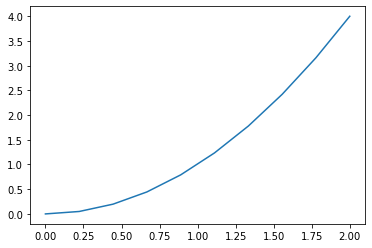

In [10]:
# Representaremos la función con el método plot()
plt.plot(x,y)
plt.show()

Parece fácil, pero los principiantes suelen cometer el error de pasar a la función `plt.plot()` dos arrays de diferente dimensión.

In [ ]:
# este código devuelve un error porque y tiene 20 puntos, mientras que x solo tiene 10
# x = np.linspace(0,2,10)
# y = np.linspace(0,2,20)
# plt.plot(x,y)
# plt.show()

Exiten otros métodos para reprensentar gráficaente, por ejemplo mediante una nube de puntos, mediante `plt.scatter(x,y)`

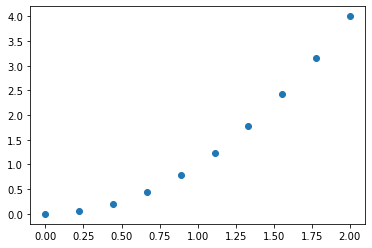

In [11]:
plt.scatter(x,y)
plt.show()

Entrando más en detalle, la función `plot()` tiene muchos más atributos que pueden ayudarnos a dar formato a los graficos.

`plot(X, Y, label=etiqueta, lw=espesor, ls=tipo de línea, c=color,...)`

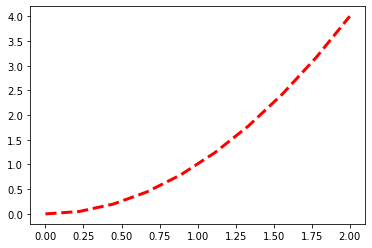

In [5]:
# las opciones de presonalización son muchas
plt.plot(x,y, c='red', lw=3, ls='--')
plt.show()

### Estructura de una figura
Algo muy importante a tener en cuenta es comprender la estructura de las figuras o el ciclo de vida de las figuras.

La estructura es siempre la misma:

1. Inicializador
* `plt.figure()`

2. Contenedor
* `plt.plot(..., ...)`
* `plt.plot(..., ...)`
* `plt.xlabel(...)`
* `plt.ylabel(...)`
...

3. Visualizador
* `plt.show()`

4. Guardado
* `plt.svefig('archivo.extensión')`

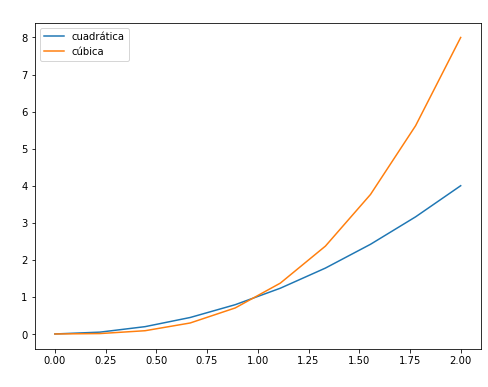

<Figure size 432x288 with 0 Axes>

In [19]:
# siguiendo el esquema

plt.figure(figsize=(8,6))            # marco de trabajo medido en pulgadas
plt.plot(x,y, label='cuadrática')    # curva 1
plt.plot(x,x**3, label='cúbica')     # curva 2
plt.title('fig 1', c='w')
plt.xlabel('eje x', c='w')
plt.ylabel('eje y', c='w')
plt.legend()                         # leyenda
plt.show()                           # metodo visualizador

plt.savefig('fig1.png')              # fichero con el resultado

### Subplot

Podemos crear una rejilla con diferentes gráficas a la vez usando el método `plt.subplot(línea, columna, posición)`

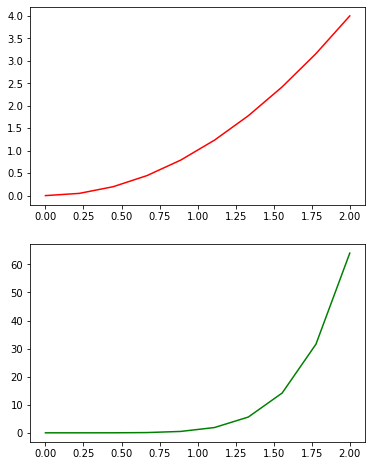

In [24]:
plt.figure(figsize=(6,8))

plt.subplot(2,1,1)
plt.plot(x,y,c='red')

plt.subplot(2,1,2)
plt.plot(x,y**3, c='green')

plt.show()

## 2. Representación Orientada a objetos
Haciendo uso del paradigma de POO y siguiendo el esquema siguiente:

`
fig, ax = plt.subplots()
ax.plot(x,y)
plt.show()
`

Hay que mencionar aquí que para el POO usaremos `plt.subplots()`, terminado en 's' y que puede llevar a confusión con lo visto un poco más arriba.

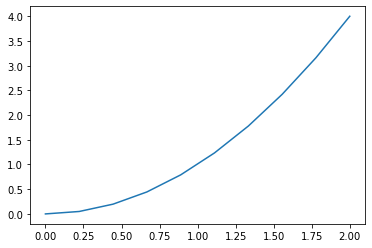

In [9]:
# creamos el espaci de trabajo y los ejes
fig, ax = plt.subplots()

# representamos
ax.plot(x,y)
plt.show()

Algo muy útil es por ejemplo representar dos gráficos que compartan uno de los ejes.
Sin embargo, al utilizar `plt.subplots()`, estamos considerando que:
1. fig es un objeto
2. ax es una tabla ndarray que contiene los objetos

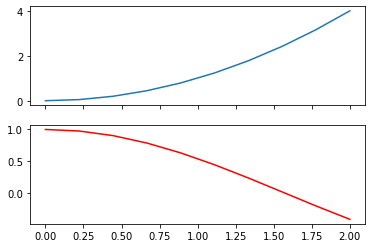

In [25]:
# dos gráficos en una columna que comparten el eje x
fig, ax = plt.subplots(2,1,sharex=True)

# cada gráfico ax lo tenemos que mencionar usando su índice
ax[0].plot(x,y)
ax[1].plot(x, np.cos(x), c='red')
plt.show()

A modo de prueba podemos explorar un poco más a cerca de la naturaleza del objeto ax

In [11]:
# tamaño de ax
ax.size

2

In [12]:
# tipo de ax
type(ax)

numpy.ndarray

In [13]:
# tipo de fig
type(fig)

matplotlib.figure.Figure

## Ejercicio
Tenemos un diccionatio con 4 datasets compuestos por 100 valores cada uno

`dataset = {f'registro {i}': np.random.randn(100) for i in range (4)}`

el ejercicio consiste en crear una función gráfica que reciba el dataset y que trace n gráficos en una sola figura.

`def dataset(dataset):`

In [31]:
dataset = {f'registro {i}': np.random.randn(100) for i in range (4)}

def graphique(data):
    
    n = len(data)
    plt.figure(figsize=(12,12))
    
    for k,i in zip(data.keys(), range(1,n+1)):
        
        plt.subplot(n,1,i)
        plt.plot(data[k])
        plt.title(k)

    plt.show()

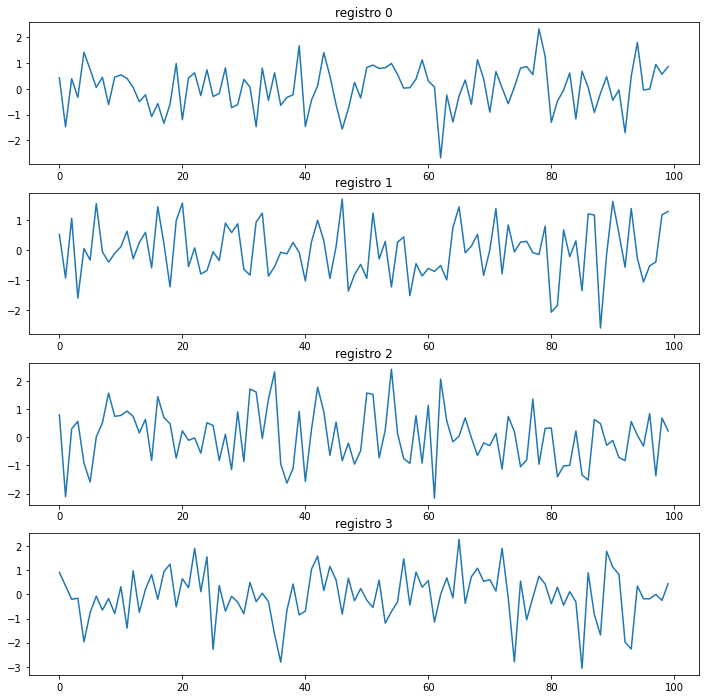

In [32]:
graphique(dataset)

# Representaciones Gráfica
[Video](https://www.youtube.com/watch?v=MILtbfrMGL4&t=244s)

Veamos el top 5 de gráficos más útiles de Matplotlib para hacer ML.

1. Scatter classification `plt.scatter()`
2. Gráfico 3D
3. Histograma
4. Gráficos de contorno
5. Representación de matrices `imshow()`

En ML prácticamente la mitad de los problemas sobre los que trabajamos son problemas de clasificación. 

Por ejemplo podemos saber si un email es spam analizando variables como las faltas de ortografía o el número de links que contiene. De este modo tendremos dos clases a clasificar en función de las variables `links` y `faltas`: 
- Spam
- No spam

Para realizar este ejemplo vamos a cargar el archiconocido dataset de la flor de iris, el cual contiene 150 registros de los tamaños de pétalos y sépalos de la flor de iris, así como su clasificación en función de la variedad de la flor.

In [2]:
# Cargamos el dataset de la flor de iris contenido en el paquete sklearn
from sklearn.datasets import load_iris

In [3]:
# asignamos el dataset a la variable iris
iris = load_iris()

X = iris.data      # guardar en X los datos
y = iris.target    # guardar en y las etiquetas

print(f'x contiene {X.shape[0]} ejemplos y {X.shape[1]} variables')
print(f'hay {np.unique(y).size} clases')

x contiene 150 ejemplos y 4 variables


NameError: name 'np' is not defined

In [24]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 1. Scatter Classification con plt.scatter()

A la hora de representar los datos mediante `plt.scatter()` tenemos que que pasarle las coordenadas x e y de los datos, esto se ha hecho pasándole los datos almacenados en x, primero le damos la coordenada horizontal `x[:,0]` y luego la coordenada vertical `x[:,1]`

[leer más sobre plt.scatter()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)

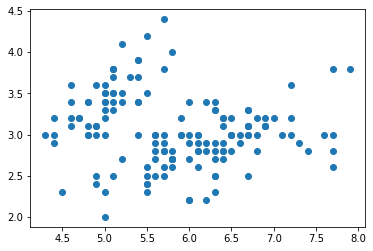

In [6]:
plt.scatter(x[:,0], x[:,1])
plt.show()

Ahora vamos a darle un poco de formato y para eso vamos a usar la variable `y` que contiene el número de las etiquetas para pasarlo como parámetro de color.

Además usaremos el parámetro `alpha` para controlar la transparencia de los puntos y el parámetro `s` para controlar el tamaño de nuestros puntos. También podemos pasarle una variable y que nos ofrezca el tamaño en función de su valor.

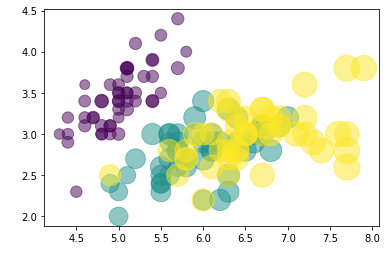

In [22]:
# el parámetro "alpha" controla la transparencia y "s" el tamaño
plt.scatter(x[:,0], x[:,1], c=y, alpha=0.5, s=x[:,2]*100)
plt.xlabel('largo del pétalo', c='w')
plt.ylabel('largo', c='w')
plt.show()

## 2. Gráfico 3D

Estos gráficos están alojados en el módulo `mpl_toolkits.mplot3d`

In [31]:
# esta sentencia nos va a permitir visualizar el gráfico en una ventana emergente
# %matplotlib

# de la librería mpl toolkits importamos ejes 3D
from mpl_toolkits.mplot3d import Axes3D

para 

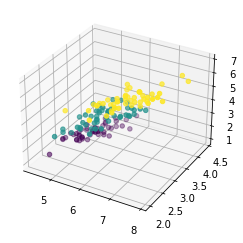

In [37]:
# creamos el objeto ax sobre el que vamos a trabajar
ax = plt.axes(projection = '3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c=y)
plt.show()

In [1]:
# imaginemos la función f que creamos con lambda

f = lambda x,y: np.sin(x) + np.cos(x+y)

In [27]:
# definimos el tamaño de los ejes X e Y 
X = np.linspace(0,5,100)
Y = np.linspace(0,5,100)

# construimos una malla bidimensional
X,Y = np.meshgrid(X,Y)

# inyectamos las dos variables en función de f dentro de Z
Z = f(X,Y)
Z.shape

(100, 100)

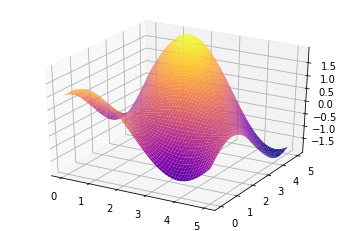

In [28]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')

## 3. Histograma

Representan gráficamente la frecuencia de los valores que toma la variable

In [2]:
# Para intar un histograma necesitamos la función plt.hist()
plt.hist(x[:,0])

NameError: name 'plt' is not defined

(array([ 4.,  1.,  4.,  2.,  5., 16.,  9.,  4.,  1.,  6., 13.,  8.,  7.,
         3.,  6., 10.,  9.,  7.,  5.,  2., 11.,  4.,  1.,  1.,  4.,  1.,
         0.,  1.,  4.,  1.]),
 array([4.3 , 4.42, 4.54, 4.66, 4.78, 4.9 , 5.02, 5.14, 5.26, 5.38, 5.5 ,
        5.62, 5.74, 5.86, 5.98, 6.1 , 6.22, 6.34, 6.46, 6.58, 6.7 , 6.82,
        6.94, 7.06, 7.18, 7.3 , 7.42, 7.54, 7.66, 7.78, 7.9 ]),
 <a list of 30 Patch objects>)

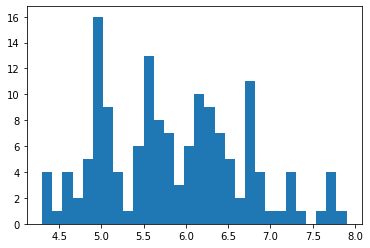

In [35]:
# Podemos crear un histograma más preciso mediante el parámetro bins. Por defecto bins=10
plt.hist(x[:,0], bins=30)


(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

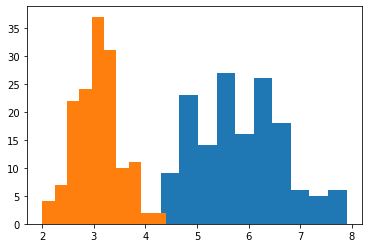

In [36]:
# Podemos estudiar dos histogramas a la vez
plt.hist(x[:,0])
plt.hist(x[:,1])

Los histogramas que hemos visto representan una dimensión, pero podemos introducir histogramas de 2D 

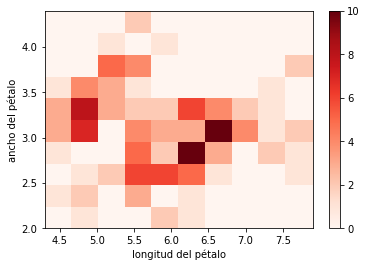

In [42]:
plt.hist2d(x[:,0],x[:,1], cmap='Reds')
plt.xlabel('longitud del pétalo')
plt.ylabel('ancho del pétalo')
plt.colorbar()

Todo esto tiene mucha utilidad a la hora de estudiar imágenes y de analizar los píxeles que la componen

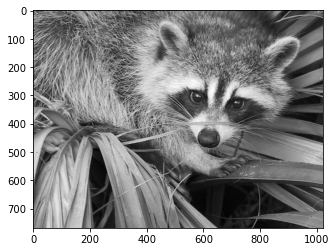

In [44]:
from scipy import misc
face = misc.face(gray=True)
plt.imshow(face, cmap='gray')
plt.show()

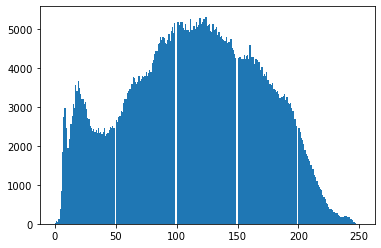

In [45]:
# Usamos la función hist, dividimos el histograma en 255 valores 
plt.hist(face.ravel(), bins=255)
plt.show()

## 4. Graficos de contorno

Este método está muy ligado con el Machine Learning y sobre todo con el concepto del Descenso del Gradiente.

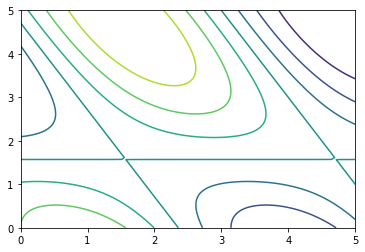

In [50]:
# vamos a reutilizar el gráfico de superficie que creamos
plt.contour(X, Y, Z)
plt.show()

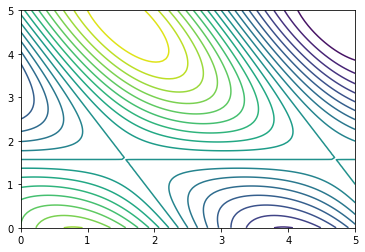

In [51]:
# Podemos afinar la precisión
plt.contour(X, Y, Z, 20)
plt.show()

In [53]:
# Si complicamos un poco más el modelo 
f = lambda x,y: np.sin(x) + np.cos(x+y)*np.cos(x)
X = np.linspace(0,5,100)
Y = np.linspace(0,5,100)

X,Y = np.meshgrid(X,Y)
Z = f(X,Y)

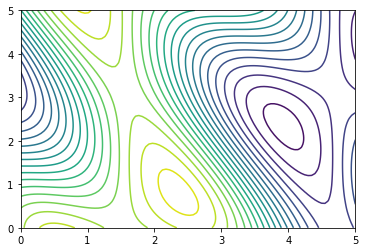

In [58]:
plt.contour(X, Y, Z, 20)
plt.show()

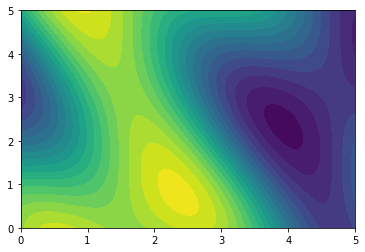

In [59]:
# Usamos contourf para colorear areas
plt.contourf(X, Y, Z, 20)
plt.show()

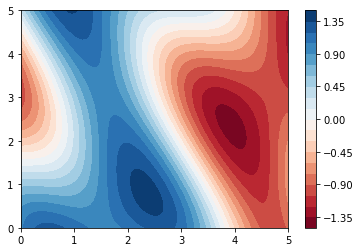

In [68]:
plt.contourf(X, Y, Z, 20, cmap='RdBu')
plt.colorbar()
plt.show()

 ## 5. imshow()
 Es un método muy polivalente que nos permite representar gráficamente cualquier matriz numpy

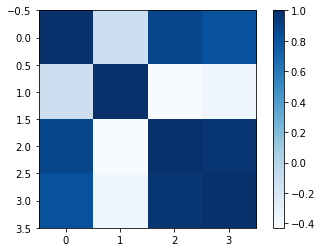

In [69]:
# Le pasamos la traspuesta de x y le calculamos el coeficiente de correlación
plt.imshow(np.corrcoef(x.T), cmap='Blues')
plt.colorbar()
plt.show()